In [3]:
dataset_url = 'https://www.kaggle.com/c/tabular-playground-series-apr-2021' 
import opendatasets as od
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: kseniyaesepkina
Your Kaggle Key: ········


  0%|                                                                                      | 0.00/4.41M [00:00<?, ?B/s]

100%|█████████████████████████████████████████████████████████████████████████████| 4.41M/4.41M [00:01<00:00, 3.87MB/s]



Extracting archive .\tabular-playground-series-apr-2021/tabular-playground-series-apr-2021.zip to .\tabular-playground-series-apr-2021


In [4]:
import pandas as pd
import numpy as np

In [5]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (20, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

# Context

In [15]:
TBS_train = pd.read_csv('./tabular-playground-series-apr-2021/train.csv', index_col='PassengerId')

In [16]:
TBS_train

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
0,1,1,"Oconnor, Frankie",male,NaN,2,0,209245,27.14,C12239,S
1,0,3,"Bryan, Drew",male,NaN,0,0,27323,13.35,NaN,S
2,0,3,"Owens, Kenneth",male,0.33,1,2,CA 457703,71.29,NaN,S
3,0,3,"Kramer, James",male,19.00,0,0,A. 10866,13.04,NaN,S
4,1,3,"Bond, Michael",male,25.00,0,0,427635,7.76,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
99995,1,2,"Bell, Adele",female,62.00,0,0,PC 15008,14.86,D17243,C
99996,0,2,"Brown, Herman",male,66.00,0,0,13273,11.15,NaN,S
99997,0,3,"Childress, Charles",male,37.00,0,0,NaN,9.95,NaN,S


In [8]:
TBS_train.shape

(100000, 11)

In [9]:
TBS_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 11 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Survived  100000 non-null  int64  
 1   Pclass    100000 non-null  int64  
 2   Name      100000 non-null  object 
 3   Sex       100000 non-null  object 
 4   Age       96708 non-null   float64
 5   SibSp     100000 non-null  int64  
 6   Parch     100000 non-null  int64  
 7   Ticket    95377 non-null   object 
 8   Fare      99866 non-null   float64
 9   Cabin     32134 non-null   object 
 10  Embarked  99750 non-null   object 
dtypes: float64(2), int64(4), object(5)
memory usage: 9.2+ MB


# Data quality assessment

In [10]:
# проверка на наличие невозможных значений
TBS_train.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,100000.000000,100000.000000,96708.000000,100000.000000,100000.000000,99866.00000
mean,0.427740,2.106910,38.355472,0.397690,0.454560,43.92933
std,0.494753,0.837727,18.313556,0.862566,0.950076,69.58882
min,0.000000,1.000000,0.080000,0.000000,0.000000,0.68000
25%,0.000000,1.000000,25.000000,0.000000,0.000000,10.04000
50%,0.000000,2.000000,39.000000,0.000000,0.000000,24.46000
75%,1.000000,3.000000,53.000000,1.000000,1.000000,33.50000
max,1.000000,3.000000,87.000000,8.000000,9.000000,744.66000


In [11]:
# проверка на наличие неподходящих значений
TBS_train.Sex.unique(), TBS_train.Survived.unique(), TBS_train.Pclass.unique(), TBS_train.Embarked.unique()

(array(['male', 'female'], dtype=object),
 array([1, 0], dtype=int64),
 array([1, 3, 2], dtype=int64),
 array(['S', 'C', 'Q', nan], dtype=object))

In [25]:
# Поищем закономерности в осутствующих данных
na_age = TBS_train_initial[TBS_train_initial.Age.isna()]
na_age.sample(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
66446,1,3,"Hollis, Norma",female,NaN,0,0,15981,10.51,NaN,C
73456,0,1,"Hess, Madeline",female,NaN,0,0,PC 12362,76.14,C8810,C
77471,1,1,"Ehsan, Kenneth",male,NaN,0,0,SC/A.3 27878,328.23,NaN,S
74668,0,2,"Mariano, Wanda",female,NaN,0,0,A. 45145,14.26,NaN,C
8179,0,3,"Allyn, Robert",male,NaN,0,0,F.C.C. 38905,9.84,NaN,S
75191,0,1,"Altic, Margaret",female,NaN,0,0,F.C.C. 19716,33.06,C16569,C
98078,1,2,"Mcginnis, Walter",male,NaN,0,0,PC 45876,68.62,B13842,Q
36783,1,2,"Marshall, Ramon",male,NaN,0,0,3833008,28.04,NaN,S
25797,1,1,"Lane, Sarah",female,NaN,1,3,69919,64.78,B21900,Q


In [27]:
na_age.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,3292.000000,3292.000000,0.0,3292.000000,3292.000000,3287.000000
mean,0.411908,2.127582,NaN,0.381531,0.433475,43.608126
std,0.492253,0.834244,NaN,0.824422,0.900797,70.970441
min,0.000000,1.000000,NaN,0.000000,0.000000,2.790000
25%,0.000000,1.000000,NaN,0.000000,0.000000,10.000000
50%,0.000000,2.000000,NaN,0.000000,0.000000,23.890000
75%,1.000000,3.000000,NaN,1.000000,1.000000,32.670000
max,1.000000,3.000000,NaN,8.000000,9.000000,732.010000


In [53]:
na_ticket = TBS_train[TBS_train.Ticket.isna()]
na_ticket.sample(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
13489,0,3,"Pfeifer, Salvador",male,26.0,0,0,NaN,5.28,NaN,S
95677,0,3,"Daugherty, Bryant",male,39.0,1,0,NaN,11.61,NaN,S
93432,0,3,"Wiley, Rosa",female,22.0,0,0,NaN,11.14,NaN,S
64171,0,3,"Cofer, Billie",female,24.0,0,0,NaN,6.48,NaN,S
47109,1,3,"Millhiser, Lina",female,57.0,3,0,NaN,7.31,NaN,S
13064,0,2,"Brunetti, Chase",male,39.0,3,0,NaN,10.63,NaN,S
82672,1,2,"Webb, Rachel",female,27.0,0,0,NaN,8.77,NaN,S
14612,0,3,"Mattews, Richard",male,28.0,0,0,NaN,7.19,NaN,S
24253,0,2,"Choudhury, Gary",male,20.0,0,0,NaN,6.10,NaN,S


In [31]:
na_ticket.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,4623.000000,4623.000000,4623.000000,4623.000000,4623.000000,4617.000000
mean,0.521955,2.810080,35.095609,0.479559,0.238590,13.339950
std,0.499572,0.406899,17.934545,1.103260,0.662371,15.035303
min,0.000000,1.000000,0.080000,0.000000,0.000000,2.460000
25%,0.000000,3.000000,23.000000,0.000000,0.000000,8.320000
50%,1.000000,3.000000,29.000000,0.000000,0.000000,9.980000
75%,1.000000,3.000000,50.000000,0.000000,0.000000,12.510000
max,1.000000,3.000000,85.000000,8.000000,6.000000,548.050000


In [55]:
na_ticket[na_ticket.Fare.isna()].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6 entries, 5007 to 50570
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  6 non-null      int64  
 1   Pclass    6 non-null      int64  
 2   Name      6 non-null      object 
 3   Sex       6 non-null      object 
 4   Age       6 non-null      float64
 5   SibSp     6 non-null      int64  
 6   Parch     6 non-null      int64  
 7   Ticket    0 non-null      object 
 8   Fare      0 non-null      float64
 9   Cabin     1 non-null      object 
 10  Embarked  6 non-null      object 
dtypes: float64(2), int64(4), object(5)
memory usage: 576.0+ bytes


Заметим, что в данных, где нет информации ни о билете, ни о цене, имеются все остальные данные, кроме кабины

In [59]:
na_ticket[na_ticket.Fare.isna()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
5007,1,3,"Philbrick, Kelly",female,50.0,0,0,NaN,NaN,NaN,S
6575,0,3,"Roberts, Edith",female,11.0,0,2,NaN,NaN,NaN,S
7520,0,3,"Gullixson, Mary",female,66.0,0,0,NaN,NaN,NaN,S
22347,1,2,"Maurice, Lakeisha",female,38.0,0,0,NaN,NaN,F18774,S
31036,1,3,"Mckee, James",male,7.0,0,0,NaN,NaN,NaN,S
50570,1,2,"Bowens, Ruby",female,58.0,1,0,NaN,NaN,NaN,S


<AxesSubplot:ylabel='Embarked'>

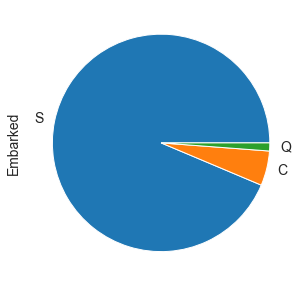

In [32]:
na_ticket.Embarked.value_counts().plot.pie()

<AxesSubplot:ylabel='Embarked'>

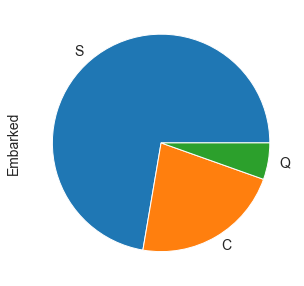

In [33]:
TBS_train.Embarked.value_counts().plot.pie()

=> Можно заметить, что большинство пассажиров, номер билетов которых отсутствует в базе данных, зашли на паром в Southhampton. Доля этих пассажиров больше чем общая по всей популяции. Данный порт был местом отплытия Титаника.

In [37]:
na_fare = TBS_train[TBS_train.Fare.isna()]
na_fare.sample(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
56770,1,2,"Bunting, Jack",male,37.0,1,0,43595,NaN,NaN,C
5007,1,3,"Philbrick, Kelly",female,50.0,0,0,NaN,NaN,NaN,S
97944,1,3,"Engleberg, Melba",female,66.0,0,1,SC/PARIS 300188,NaN,NaN,S
76798,0,3,"Lybbert, David",male,22.0,1,0,207845,NaN,NaN,S
31402,0,2,"Arnold, Jeffrey",male,9.0,1,2,CA. 39294,NaN,NaN,S
1999,0,3,"Flatley, Trena",female,3.0,1,2,457224,NaN,NaN,S
4289,1,2,"Clark, Francis",male,7.0,0,1,450380,NaN,NaN,S
78110,0,2,"Stevenson, Steven",male,22.0,0,0,7318,NaN,NaN,S
13685,0,1,"Rusk, Frederick",male,36.0,0,3,S.C./PARIS 3874867,NaN,A7251,S


In [39]:
na_fare.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,134.000000,134.000000,134.000000,134.000000,134.000000,0.0
mean,0.455224,2.089552,38.544179,0.313433,0.477612,NaN
std,0.499860,0.826831,17.782044,0.642105,0.801469,NaN
min,0.000000,1.000000,0.920000,0.000000,0.000000,NaN
25%,0.000000,1.000000,25.000000,0.000000,0.000000,NaN
50%,0.000000,2.000000,39.000000,0.000000,0.000000,NaN
75%,1.000000,3.000000,53.000000,0.750000,1.000000,NaN
max,1.000000,3.000000,73.000000,4.000000,3.000000,NaN


In [47]:
na_fare[na_fare.Ticket.isna()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
5007,1,3,"Philbrick, Kelly",female,50.0,0,0,NaN,NaN,NaN,S
6575,0,3,"Roberts, Edith",female,11.0,0,2,NaN,NaN,NaN,S
7520,0,3,"Gullixson, Mary",female,66.0,0,0,NaN,NaN,NaN,S
22347,1,2,"Maurice, Lakeisha",female,38.0,0,0,NaN,NaN,F18774,S
31036,1,3,"Mckee, James",male,7.0,0,0,NaN,NaN,NaN,S
50570,1,2,"Bowens, Ruby",female,58.0,1,0,NaN,NaN,NaN,S


In [62]:
not_na_cabin = TBS_train[~TBS_train.Cabin.isna()]
not_na_cabin

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
0,1,1,"Oconnor, Frankie",male,39.0,2,0,209245,27.14,C12239,S
8,0,1,"Wardlaw, Michael",male,27.0,2,1,474849,73.02,A7253,S
9,0,2,"Greigo, Rudy",male,66.0,0,0,6981,9.14,D2969,C
11,0,1,"Telschow, Robert",male,60.0,0,0,19600,31.50,A9055,S
12,0,3,"Stewart, Pat",male,36.0,0,0,434108,9.34,C8674,S
...,...,...,...,...,...,...,...,...,...,...,...
99967,0,1,"Harrier, Stacey",male,49.0,2,0,402064,225.51,A4590,S
99989,1,1,"Harris, Amy",female,64.0,0,1,27728,31.66,D12975,C
99991,0,1,"Hogan, Todd",male,53.0,0,5,CA 48075,30.09,B19289,Q


In [63]:
not_na_cabin.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32134 entries, 0 to 99995
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  32134 non-null  int64  
 1   Pclass    32134 non-null  int64  
 2   Name      32134 non-null  object 
 3   Sex       32134 non-null  object 
 4   Age       32134 non-null  float64
 5   SibSp     32134 non-null  int64  
 6   Parch     32134 non-null  int64  
 7   Ticket    32051 non-null  object 
 8   Fare      32092 non-null  float64
 9   Cabin     32134 non-null  object 
 10  Embarked  32046 non-null  object 
dtypes: float64(2), int64(4), object(5)
memory usage: 2.9+ MB


<AxesSubplot:ylabel='Embarked'>

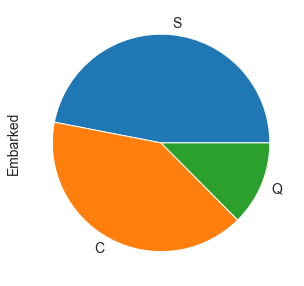

In [64]:
not_na_cabin.Embarked.value_counts().plot.pie()

<AxesSubplot:ylabel='Sex'>

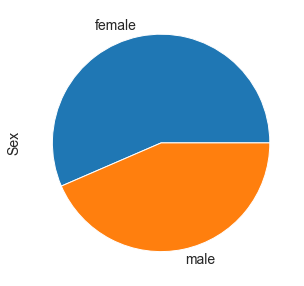

In [66]:
not_na_cabin.Sex.value_counts().plot.pie()

# Data exploration

In [19]:
continuous_col = ['Age', 'SibSp', 'Parch', 'Fare']

In [95]:
# mean, standart deviatioon
TBS_train[continuous_col].describe()

,Age,SibSp,Parch,Fare
count,100000.000000,100000.000000,100000.000000,99866.00000
mean,38.376690,0.397690,0.454560,43.92933
std,18.009956,0.862566,0.950076,69.58882
min,0.080000,0.000000,0.000000,0.68000
25%,25.000000,0.000000,0.000000,10.04000
50%,39.000000,0.000000,0.000000,24.46000
75%,53.000000,1.000000,1.000000,33.50000
max,87.000000,8.000000,9.000000,744.66000


In [20]:
TBS_train_initial[continuous_col].mode()

,Age,SibSp,Parch,Fare
0,25.0,0.0,0.0,9.27
1,NaN,NaN,NaN,9.85


In [111]:
stat_measures = []
for col in continuous_col[:-1]:
    Q3 = np.quantile(TBS_train[col], 0.75)
    Q1 = np.quantile(TBS_train[col], 0.25)
    IQR = Q3 - Q1
    intq_mean = TBS_train[(TBS_train[col] <= Q3) & (TBS_train[col] >= Q1)][col].mean()
    range_ = TBS_train[col].max() - TBS_train[col].min()
    variance = np.square(TBS_train[col].std())
    stat_measures.append([intq_mean, IQR, range_, variance])
stat_measures = pd.DataFrame(data=stat_measures, index=continuous_col[:-1], columns=['Interquartile mean', 'IQR', 'Range', 'Variance'])
stat_measures

,Interquartile mean,IQR,Range,Variance
Age,38.660259,28.0,86.92,324.358520
SibSp,0.212301,1.0,8.00,0.744020
Parch,0.150180,1.0,9.00,0.902644


<AxesSubplot:xlabel='Age'>

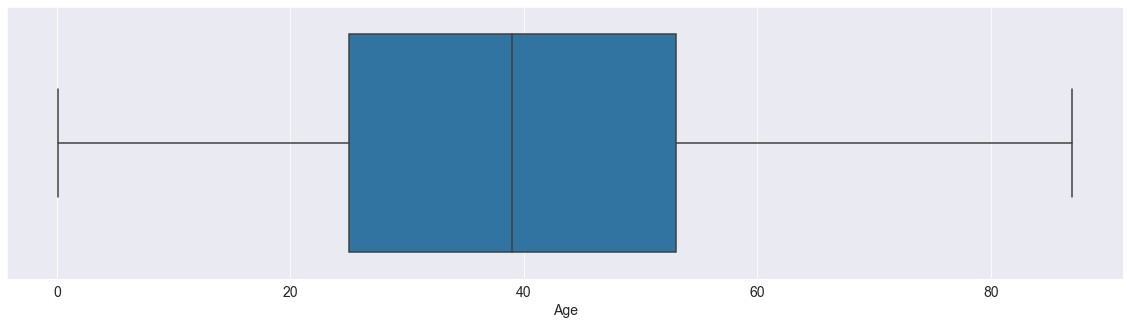

In [21]:
sns.boxplot(x = TBS_train.Age)

<AxesSubplot:xlabel='SibSp'>

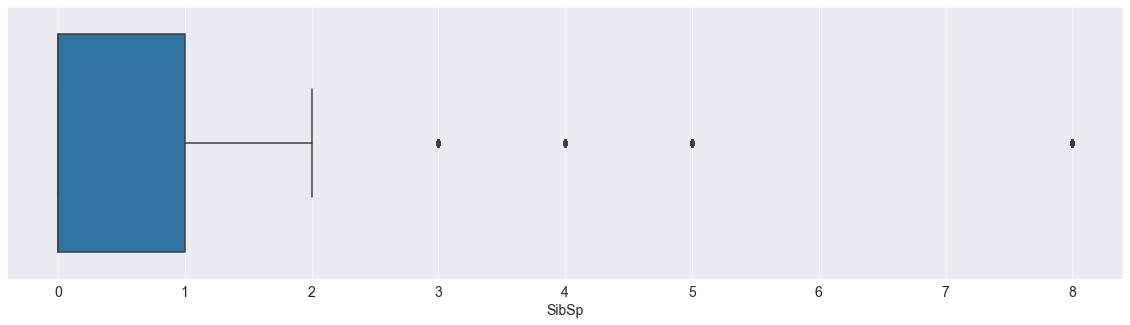

In [22]:
sns.boxplot(x = TBS_train.SibSp)

In [27]:
TBS_train[TBS_train.SibSp == 8]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
204,1,3,"Bennett, Shirley",female,12.0,8,1,21620,12.51,NaN,C
692,0,2,"Gomes, James",male,35.0,8,2,A/5,24.55,NaN,S
708,0,1,"Ulloa, Mathew",male,53.0,8,1,13352,195.94,A7232,S
1000,1,3,"Harper, Barbara",female,33.0,8,1,28882,64.99,NaN,S
1230,0,3,"Carlson, Douglas",male,29.0,8,1,338099,9.26,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
99250,0,2,"Medina, Bernard",male,33.0,8,1,13144,25.15,NaN,S
99301,1,2,"Henderson, Stacy",female,1.0,8,1,17419,25.11,NaN,S
99356,0,3,"Gellert, Ray",male,36.0,8,0,461666,12.21,NaN,S


<AxesSubplot:xlabel='Parch'>

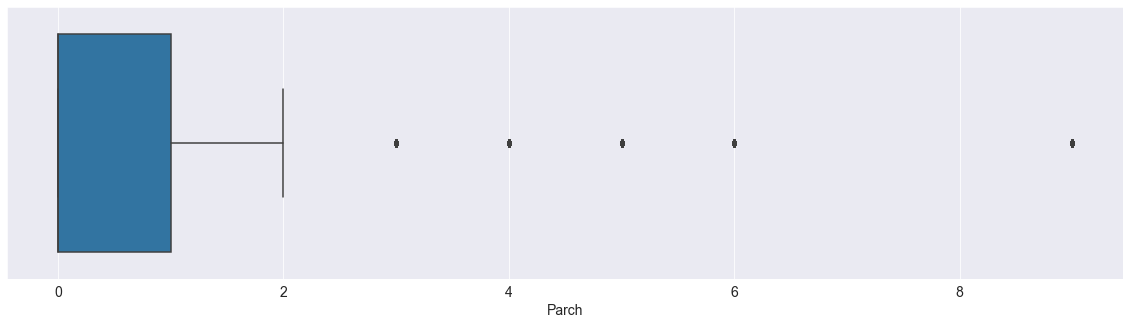

In [23]:
sns.boxplot(x = TBS_train.Parch)

In [28]:
TBS_train[TBS_train.Parch > 8]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1436,0,1,"Russell, Leona",female,23.0,1,9,PC 27443,92.25,B6812,S
2124,1,3,"Martinez, Megan",female,29.0,0,9,22900,11.12,NaN,C
2610,0,3,"Cote, Theresa",female,7.0,0,9,21071,7.54,NaN,S
3732,0,3,"Folks, Kent",male,35.0,0,9,429586,10.11,NaN,S
3920,0,1,"Aivao, Richard",male,55.0,1,9,455541,36.47,B13857,S
...,...,...,...,...,...,...,...,...,...,...,...
96654,1,1,"Treaster, Alan",male,58.0,1,9,237174,123.46,B13836,S
96709,0,3,"Schiele, George",male,38.0,0,9,382811,12.93,NaN,S
96762,0,2,"Hummel, Sharon",female,42.0,0,9,C.A. 7923,29.93,NaN,S


In [17]:
TBS_train_meanage = TBS_train.groupby(['Pclass', 'Sex']).median().Age.unstack()
TBS_train_meanage

Sex,female,male
Pclass,,
1,49.0,44.0
2,40.0,37.0
3,28.0,31.0


In [12]:
# Заполним строки с неизвестным значением возраста средним
TBS_train_initial = TBS_train.copy()
median_age = TBS_train.Age.median()
TBS_train.Age.fillna(median_age, inplace=True)
TBS_train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
0,1,1,"Oconnor, Frankie",male,39.00,2,0,209245,27.14,C12239,S
1,0,3,"Bryan, Drew",male,39.00,0,0,27323,13.35,NaN,S
2,0,3,"Owens, Kenneth",male,0.33,1,2,CA 457703,71.29,NaN,S
3,0,3,"Kramer, James",male,19.00,0,0,A. 10866,13.04,NaN,S
4,1,3,"Bond, Michael",male,25.00,0,0,427635,7.76,NaN,S


In [13]:
TBS_train_initial.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
0,1,1,"Oconnor, Frankie",male,NaN,2,0,209245,27.14,C12239,S
1,0,3,"Bryan, Drew",male,NaN,0,0,27323,13.35,NaN,S
2,0,3,"Owens, Kenneth",male,0.33,1,2,CA 457703,71.29,NaN,S
3,0,3,"Kramer, James",male,19.00,0,0,A. 10866,13.04,NaN,S
4,1,3,"Bond, Michael",male,25.00,0,0,427635,7.76,NaN,S


In [18]:
TBS_train.sample(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
27294,0,1,"Schuette, Kristina",female,56.0,0,0,STON/O 34445,28.12,NaN,S
24955,0,2,"Stillman, Wally",male,29.0,0,0,12666,25.53,NaN,S
1358,0,3,"Martinez, Coleman",male,69.0,0,0,11102,8.01,NaN,S
67972,1,1,"Watson, Elois",female,76.0,0,2,341632,112.90,B13752,Q
22971,0,3,"Torres, Steve",male,0.5,1,2,497791,29.23,NaN,C
71262,0,3,"Moody, Thomas",male,19.0,0,1,4085964,9.81,NaN,S
2357,1,1,"Jones, Melissa",female,45.0,0,0,PC 189907,184.59,C13117,S
26748,1,2,"Filmore, Paul",male,55.0,0,0,9575,5.67,NaN,S
42113,0,1,"Swan, Gregory",male,30.0,0,0,28582,112.19,C19229,C


<AxesSubplot:xlabel='Fare'>

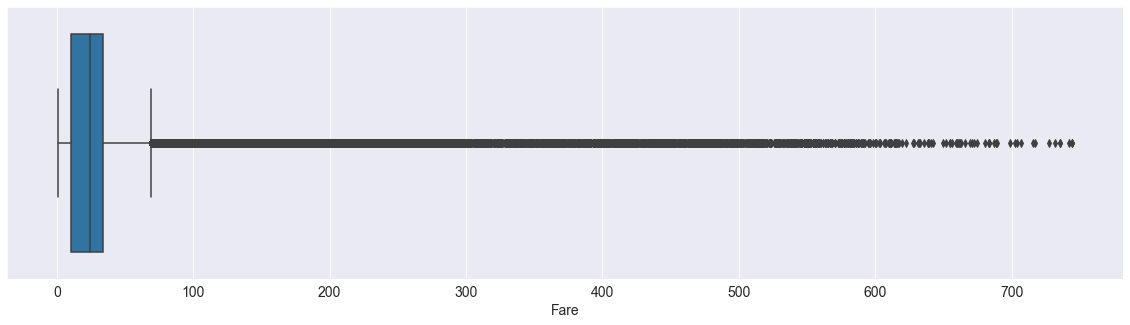

In [9]:
# Посмотрим, нет ли подозрительных выбросов в цене
sns.boxplot(x = TBS_train.Fare)

<AxesSubplot:xlabel='Fare'>

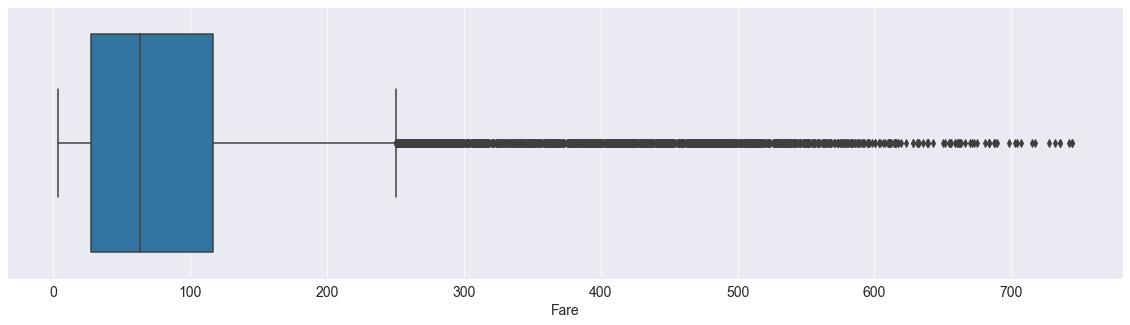

In [10]:
# Distribution of fare for the 1st class
sns.boxplot(x = TBS_train[TBS_train.Pclass == 1].Fare)

<AxesSubplot:xlabel='Fare'>

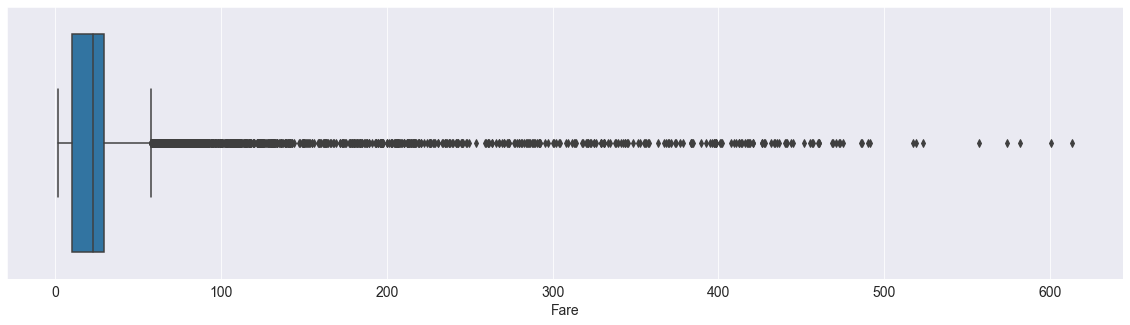

In [11]:
# Distribution of fare for the 2nd class
sns.boxplot(x = TBS_train[TBS_train.Pclass == 2].Fare)

<AxesSubplot:xlabel='Fare'>

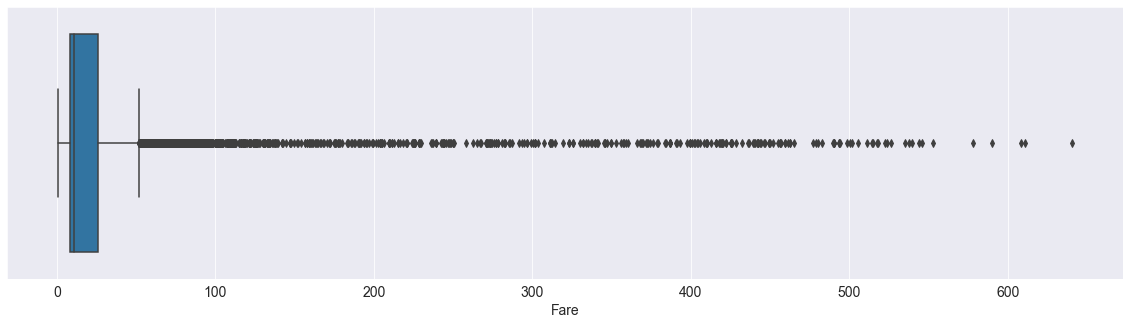

In [12]:
# Distribution of fare for the 3rd class
sns.boxplot(x = TBS_train[TBS_train.Pclass == 3].Fare)

In [13]:
TBS_train.groupby('Pclass').Fare.describe()

,count,mean,std,min,25%,50%,75%,max
Pclass,,,,,,,,
1,30275.0,92.653113,99.821850,3.38,27.89,63.58,116.875,744.66
2,28637.0,25.756003,34.849110,1.72,10.17,22.72,29.210,613.43
3,40954.0,20.618226,32.621763,0.68,8.54,10.96,25.770,640.79


<AxesSubplot:ylabel='Sex'>

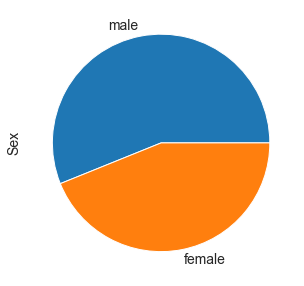

In [68]:
TBS_train.Sex.value_counts().plot.pie()

In [71]:
TBS_train.groupby('Sex').mean()['Survived']

Sex
female    0.711525
male      0.205795
Name: Survived, dtype: float64

=> Выжил 71% пассажиров женского пола и только чуть больше 20% пассажиров мужского пола.
Можно сделать вывод, что вероятность выживаемости косвенно зависила от пола пассажира, что скорее всего связано с культурными обычаями.

<AxesSubplot:title={'center':'Probability of surviving based on Sex'}, ylabel='Sex'>

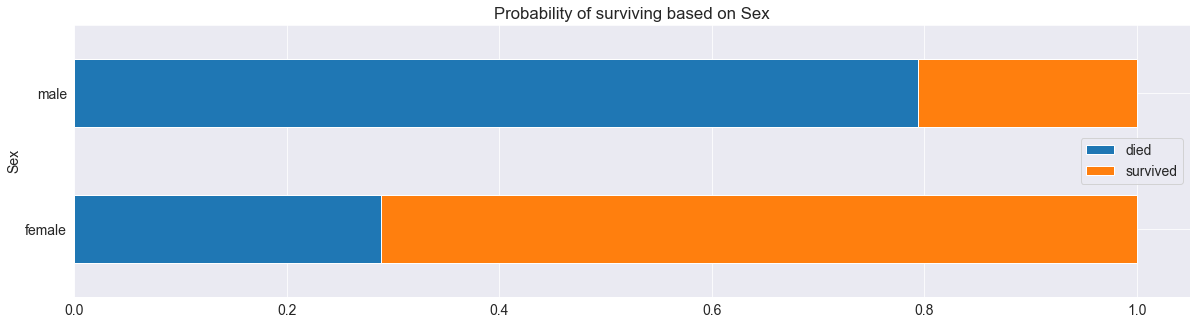

In [72]:
TBS_train.groupby(['Sex', 'Survived']).size().unstack().apply(lambda x: pd.Series([float(el)/sum(x) for el in x], \
            index=['died', 'survived']), axis=1).plot(kind='barh', stacked=True, \
                                                      title='Probability of surviving based on Sex')

<AxesSubplot:ylabel='Pclass'>

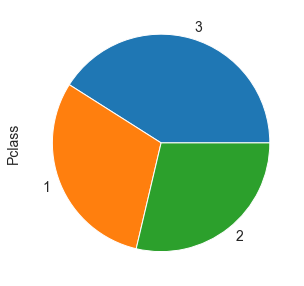

In [73]:
TBS_train.Pclass.value_counts().plot.pie()

In [74]:
TBS_train.groupby('Pclass').mean()['Survived']

Pclass
1    0.579779
2    0.525018
3    0.247305
Name: Survived, dtype: float64

=> Вероятность выжить у пассажиров второго класса была в два раза выше, чем у пассажиров третьего класса. Пассажиры первого класса выживали с вероятностью на 5% выше, чем пассажиры второго.

<AxesSubplot:title={'center':'Probability of surviving based on Pclass'}, ylabel='Pclass'>

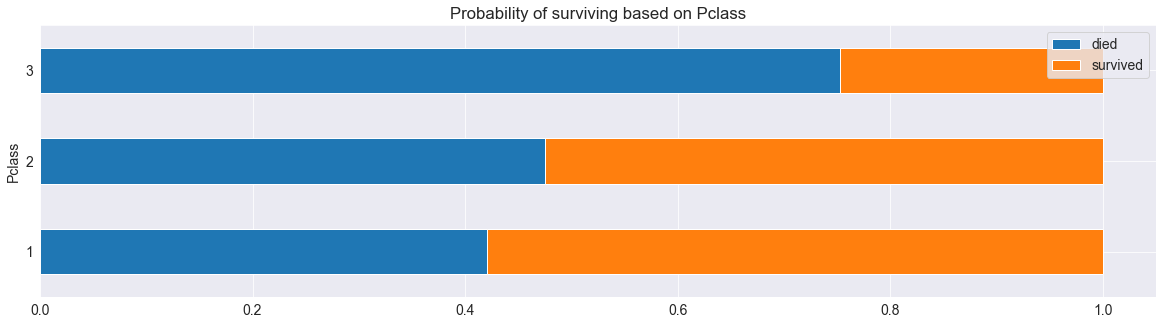

In [75]:
TBS_train.groupby(['Pclass', 'Survived']).size().unstack().apply(lambda x: pd.Series([float(el)/sum(x) for el in x], \
          index=['died', 'survived']), axis=1).plot(kind='barh', stacked=True, \
                                                    title='Probability of surviving based on Pclass')

<AxesSubplot:title={'center':'Fare Distribution'}, ylabel='Frequency'>

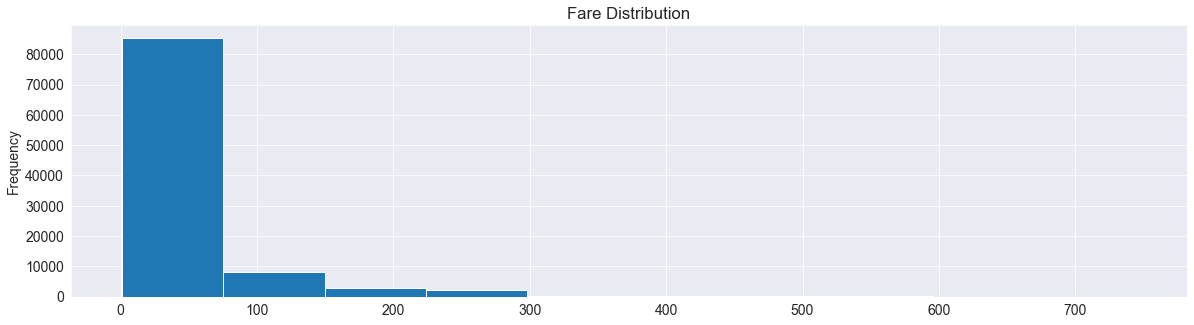

In [76]:
TBS_train.Fare.plot(kind='hist', title='Fare Distribution')

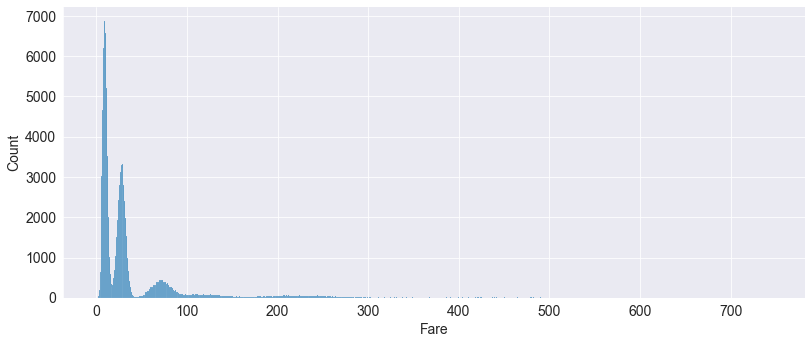

In [117]:
sns.displot(TBS_train.Fare, aspect=2.3)

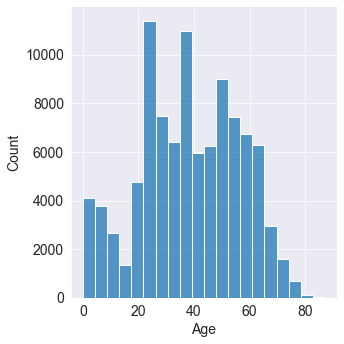

In [113]:
sns.displot(TBS_train.Age, bins=20)

In [78]:
TBS_train['Agegroup'] = (TBS_train.Age // 10).astype(int)
TBS_train

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Agegroup
PassengerId,,,,,,,,,,,,
0,1,1,"Oconnor, Frankie",male,39.00,2,0,209245,27.14,C12239,S,3
1,0,3,"Bryan, Drew",male,39.00,0,0,27323,13.35,NaN,S,3
2,0,3,"Owens, Kenneth",male,0.33,1,2,CA 457703,71.29,NaN,S,0
3,0,3,"Kramer, James",male,19.00,0,0,A. 10866,13.04,NaN,S,1
4,1,3,"Bond, Michael",male,25.00,0,0,427635,7.76,NaN,S,2
...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1,2,"Bell, Adele",female,62.00,0,0,PC 15008,14.86,D17243,C,6
99996,0,2,"Brown, Herman",male,66.00,0,0,13273,11.15,NaN,S,6
99997,0,3,"Childress, Charles",male,37.00,0,0,NaN,9.95,NaN,S,3


<AxesSubplot:title={'center':'Probability of surviving based on age group'}, xlabel='Agegroup'>

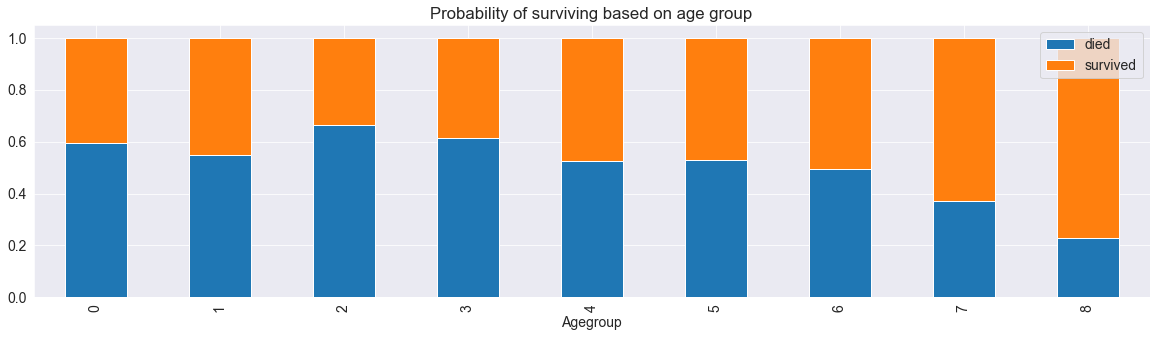

In [79]:
TBS_train.groupby(['Agegroup', 'Survived']).size().unstack().apply(lambda x: pd.Series([float(el)/sum(x) for el in x], index=['died', 'survived']), axis=1).plot(kind='bar', stacked=True, title='Probability of surviving based on age group')

<AxesSubplot:>

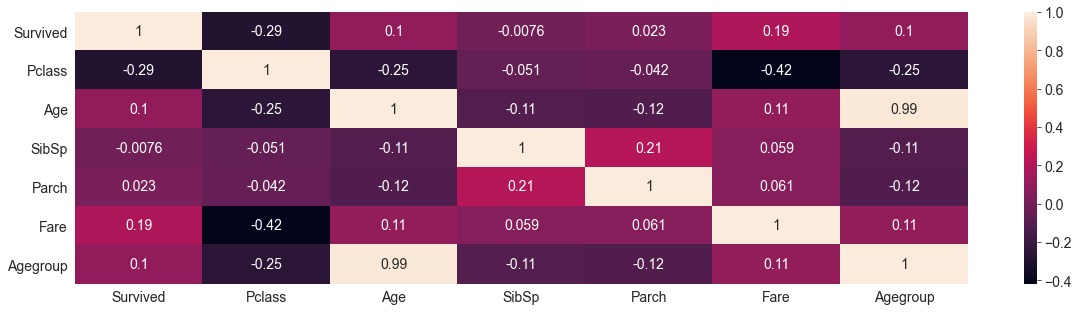

In [118]:
sns.heatmap(TBS_train.corr(), annot=True,)

Здесь можно заметить неплохую линейную зависимоть класса и выживаемости

In [41]:
data_with_cabin = TBS_train[~TBS_train.Cabin.isna()]
data_with_cabin['Deck'] = data_with_cabin.Cabin.str.get(0)
data_with_cabin

<ipython-input-41-1c098d59c7eb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_with_cabin['Deck'] = data_with_cabin.Cabin.str.get(0)


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck
PassengerId,,,,,,,,,,,,
0,1,1,"Oconnor, Frankie",male,NaN,2,0,209245,27.14,C12239,S,C
8,0,1,"Wardlaw, Michael",male,27.0,2,1,474849,73.02,A7253,S,A
9,0,2,"Greigo, Rudy",male,66.0,0,0,6981,9.14,D2969,C,D
11,0,1,"Telschow, Robert",male,60.0,0,0,19600,31.50,A9055,S,A
12,0,3,"Stewart, Pat",male,36.0,0,0,434108,9.34,C8674,S,C
...,...,...,...,...,...,...,...,...,...,...,...,...
99967,0,1,"Harrier, Stacey",male,49.0,2,0,402064,225.51,A4590,S,A
99989,1,1,"Harris, Amy",female,64.0,0,1,27728,31.66,D12975,C,D
99991,0,1,"Hogan, Todd",male,53.0,0,5,CA 48075,30.09,B19289,Q,B


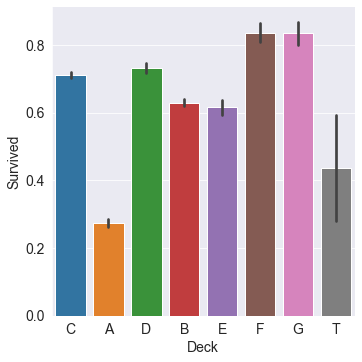

In [42]:
sns.catplot(x="Deck", y="Survived",  kind="bar", data=data_with_cabin)

# Summary

В процессе анализа имеющихся данных были сделаны следующие выводы:

 * В данных, где отсутствует информация и о номере билета, и о его цене, имеются все остальные данные, кроме номера кабины
 * Большинство пассажиров, номера билетов которых отсутствуют в базе данных, зашли на паром в порту Southhampton. Доля этих пассажиров больше, чем общая по всей популяции. Данный порт был местом отплытия Титаника.
 * Колонка Fare - единственная из количественных непрерывных характеристик, являющаяся бимодальной. Но при этом стоит учитывать, что значения обеих мод крайне близки.